In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

# Base URL for FOMC statements
base_url = "https://www.federalreserve.gov/newsevents/pressreleases/monetary"

In [2]:
# Function to fetch statement text
def fetch_statement(url_suffix):
    url = f"{base_url}{url_suffix}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    paragraphs = soup.find_all("p")
    statement = " ".join(p.get_text() for p in paragraphs)
    return statement

# Full FOMC statement URL suffixes from 2020 to 2025
fomc_meetings = {
    "2020-01-29": "20200129a.htm",
    "2020-03-03": "20200303a.htm",
    "2020-03-15": "20200315a.htm",
    "2020-03-23": "20200323a.htm",
    "2020-04-29": "20200429a.htm",
    "2020-06-10": "20200610a.htm",
    "2020-07-29": "20200729a.htm",
    "2020-09-16": "20200916a.htm",
    "2020-11-05": "20201105a.htm",
    "2020-12-16": "20201216a.htm",
    "2021-01-27": "20210127a.htm",
    "2021-03-17": "20210317a.htm",
    "2021-04-28": "20210428a.htm",
    "2021-06-16": "20210616a.htm",
    "2021-07-28": "20210728a.htm",
    "2021-09-22": "20210922a.htm",
    "2021-11-03": "20211103a.htm",
    "2021-12-15": "20211215a.htm",
    "2022-01-26": "20220126a.htm",
    "2022-03-16": "20220316a.htm",
    "2022-05-04": "20220504a.htm",
    "2022-06-15": "20220615a.htm",
    "2022-07-27": "20220727a.htm",
    "2022-09-21": "20220921a.htm",
    "2022-11-02": "20221102a.htm",
    "2022-12-14": "20221214a.htm",
    "2023-02-01": "20230201a.htm",
    "2023-03-22": "20230322a.htm",
    "2023-05-03": "20230503a.htm",
    "2023-06-14": "20230614a.htm",
    "2023-07-26": "20230726a.htm",
    "2023-09-20": "20230920a.htm",
    "2023-11-01": "20231101a.htm",
    "2023-12-13": "20231213a.htm",
    "2024-01-31": "20240131a.htm",
    "2024-03-20": "20240320a.htm",
    "2024-05-01": "20240501a.htm",
    "2024-06-12": "20240612a.htm",
    "2024-07-31": "20240731a.htm",
    "2024-09-18": "20240918a.htm",
    "2024-11-07": "20241107a.htm",
    "2024-12-18": "20241218a.htm",
    "2025-01-29": "20250129a.htm",
    "2025-03-19": "20250319a.htm",
    "2025-04-30": "20250430a.htm",
    "2025-06-11": "20250611a.htm",
    "2025-07-30": "20250730a.htm",
    "2025-09-17": "20250917a.htm",
    "2025-11-05": "20251105a.htm",
    "2025-12-17": "20251217a.htm"
}

# Fetch statements and store in a DataFrame
data = []
for date_str, url_suffix in fomc_meetings.items():
    date = datetime.strptime(date_str, "%Y-%m-%d")
    try:
        statement = fetch_statement(url_suffix)
        data.append({"date": date, "statement": statement})
    except Exception as e:
        data.append({"date": date, "statement": f"ERROR: {str(e)}"})

df_statements = pd.DataFrame(data)



In [3]:
df_statements.to_csv("df_statements.csv", index=False)

In [8]:
df_statements = pd.read_csv('df_statements.csv')

In [4]:
df_statements.head(10)

,date,statement
0,2020-01-29,"\nThe Federal Reserve, the central bank of the..."
1,2020-03-03,"\nThe Federal Reserve, the central bank of the..."
2,2020-03-15,"\nThe Federal Reserve, the central bank of the..."
3,2020-03-23,"\nThe Federal Reserve, the central bank of the..."
4,2020-04-29,"\nThe Federal Reserve, the central bank of the..."
5,2020-06-10,"\nThe Federal Reserve, the central bank of the..."
6,2020-07-29,"\nThe Federal Reserve, the central bank of the..."
7,2020-09-16,"\nThe Federal Reserve, the central bank of the..."
8,2020-11-05,"\nThe Federal Reserve, the central bank of the..."
9,2020-12-16,"\nThe Federal Reserve, the central bank of the..."


In [5]:

url = f"{base_url}{url_suffix}"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
paragraphs = soup.find_all("p")
statement = " ".join(p.get_text() for p in paragraphs)


policy_text = []
for p in paragraphs:
    text = p.get_text().strip()
    if "For immediate release" in text or "Supplementary Information" in text:
        continue
    if len(text) > 20:  # Skip tiny footer links
        policy_text.append(text)

# Join into one string
core_statement = " ".join(policy_text)

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    return analyzer.polarity_scores(text)["compound"]

df_statements["sentiment"] = df_statements["statement"].apply(analyze_sentiment)


In [8]:
import yfinance as yf

# Define the tickers
tickers = ["SPY", "^TNX", "^VIX"]

# Fetch historical data
data = yf.download(tickers, start="2020-01-01", end="2025-12-31")

# Extract adjusted close prices
df_financials = data["Close"].reset_index()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


In [9]:
# Merge on date
df_merged = pd.merge(df_statements, df_financials, left_on="date", right_on="Date", how="inner")

# Drop redundant date column
df_merged.drop(columns=["Date"], inplace=True)


In [10]:
df_merged.head(10)

,date,statement,sentiment,SPY,^TNX,^VIX
0,2020-01-29,"\nThe Federal Reserve, the central bank of the...",0.9349,302.817383,1.594,16.389999
1,2020-03-03,"\nThe Federal Reserve, the central bank of the...",0.9493,278.359894,1.010,36.820000
2,2020-03-23,"\nThe Federal Reserve, the central bank of the...",0.9985,207.917847,0.764,61.590000
3,2020-04-29,"\nThe Federal Reserve, the central bank of the...",0.9851,273.440704,0.627,31.230000
4,2020-06-10,"\nThe Federal Reserve, the central bank of the...",0.9903,297.491852,0.748,27.570000
5,2020-07-29,"\nThe Federal Reserve, the central bank of the...",0.9901,304.533447,0.579,24.100000
6,2020-09-16,"\nThe Federal Reserve, the central bank of the...",0.9899,317.365997,0.687,26.040001
7,2020-11-05,"\nThe Federal Reserve, the central bank of the...",0.9761,329.376038,0.776,27.580000
8,2020-12-16,"\nThe Federal Reserve, the central bank of the...",0.9867,348.118835,0.920,22.500000
9,2021-01-27,"\nThe Federal Reserve, the central bank of the...",0.9863,353.607208,1.014,37.209999


In [11]:
correlations = df_merged[["sentiment", "SPY", "^TNX", "^VIX"]].corr()
print(correlations)


           sentiment       SPY      ^TNX      ^VIX
sentiment   1.000000  0.059412 -0.238693  0.024938
SPY         0.059412  1.000000  0.738035 -0.619123
^TNX       -0.238693  0.738035  1.000000 -0.514306
^VIX        0.024938 -0.619123 -0.514306  1.000000


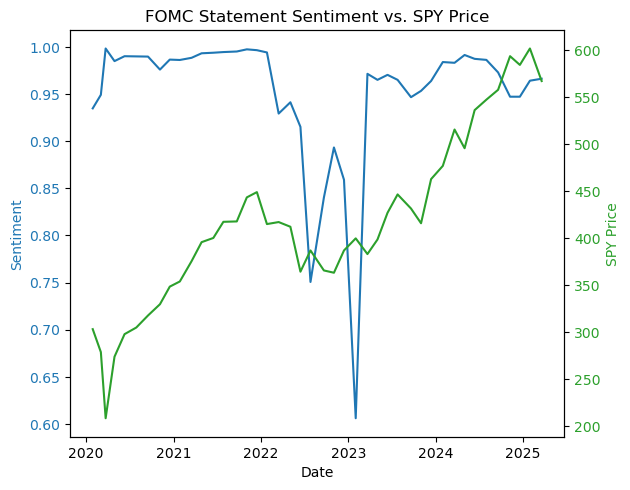

In [12]:
import matplotlib.pyplot as plt

# Plot sentiment and SPY
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='tab:blue')
ax1.plot(df_merged['date'], df_merged['sentiment'], color='tab:blue', label='Sentiment')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('SPY Price', color='tab:green')
ax2.plot(df_merged['date'], df_merged['SPY'], color='tab:green', label='SPY')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('FOMC Statement Sentiment vs. SPY Price')
plt.show()


In [13]:
import re

def extract_release_section(text):
    lines = text.splitlines()
    
    # Find the line containing "For release at"
    for i, line in enumerate(lines):
        if "for release at" in line.lower():
            # Return all lines after this one
            return "\n".join(lines[i+1:]).strip()
    
    return text.strip()  # fallback: full text if not found


In [14]:
df_release = pd.DataFrame()
print(df_release)


Empty DataFrame
Columns: []
Index: []


In [15]:
df_release = pd.DataFrame(columns=['date', 'release','sentiment'])
print(df_release)

Empty DataFrame
Columns: [date, release, sentiment]
Index: []


In [16]:
df_merged.head(10)

,date,statement,sentiment,SPY,^TNX,^VIX
0,2020-01-29,"\nThe Federal Reserve, the central bank of the...",0.9349,302.817383,1.594,16.389999
1,2020-03-03,"\nThe Federal Reserve, the central bank of the...",0.9493,278.359894,1.010,36.820000
2,2020-03-23,"\nThe Federal Reserve, the central bank of the...",0.9985,207.917847,0.764,61.590000
3,2020-04-29,"\nThe Federal Reserve, the central bank of the...",0.9851,273.440704,0.627,31.230000
4,2020-06-10,"\nThe Federal Reserve, the central bank of the...",0.9903,297.491852,0.748,27.570000
5,2020-07-29,"\nThe Federal Reserve, the central bank of the...",0.9901,304.533447,0.579,24.100000
6,2020-09-16,"\nThe Federal Reserve, the central bank of the...",0.9899,317.365997,0.687,26.040001
7,2020-11-05,"\nThe Federal Reserve, the central bank of the...",0.9761,329.376038,0.776,27.580000
8,2020-12-16,"\nThe Federal Reserve, the central bank of the...",0.9867,348.118835,0.920,22.500000
9,2021-01-27,"\nThe Federal Reserve, the central bank of the...",0.9863,353.607208,1.014,37.209999


In [17]:

# Extract release section and calculate sentiment
df_release["release"] = df_merged["statement"].apply(extract_release_section)
df_release['date'] = df_merged['date']


In [20]:
df_release.head(10)

,date,release,sentiment
0,2020-01-29,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,NaN
1,2020-03-03,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,NaN
2,2020-03-23,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,NaN
3,2020-04-29,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,NaN
4,2020-06-10,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,NaN
5,2020-07-29,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,NaN
6,2020-09-16,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,NaN
7,2020-11-05,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,NaN
8,2020-12-16,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,NaN
9,2021-01-27,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,NaN


In [21]:
df_release["sentiment"] = df_release["release"].apply(
    lambda text: analyzer.polarity_scores(text)["compound"]
)

In [50]:
df_release.head(10)


,date,release,sentiment
0,2020-01-29,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,0.4588
1,2020-03-03,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,0.6705
2,2020-03-23,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,0.9981
3,2020-04-29,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,0.9636
4,2020-06-10,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,0.9806
5,2020-07-29,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,0.9863
6,2020-09-16,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,0.9860
7,2020-11-05,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,0.9600
8,2020-12-16,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,0.9807
9,2021-01-27,Share\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,0.9682


In [ ]:
df_release.to_csv("fomc_release_sentiment_only.csv", index=False)


In [56]:
j=df_release.iloc[0,1]
print(j)

Share
























 Information received since the Federal Open Market Committee met in December indicates that the labor market remains strong and that economic activity has been rising at a moderate rate. Job gains have been solid, on average, in recent months, and the unemployment rate has remained low. Although household spending has been rising at a moderate pace, business fixed investment and exports remain weak. On a 12‑month basis, overall inflation and inflation for items other than food and energy are running below 2 percent. Market-based measures of inflation compensation remain low; survey-based measures of longer-term inflation expectations are little changed. Consistent with its statutory mandate, the Committee seeks to foster maximum employment and price stability. The Committee decided to maintain the target range for the federal funds rate at 1‑1/2 to 1-3/4 percent. The Committee judges that the current stance of monetary policy is appropriate to support sus

In [57]:
x = analyzer.polarity_scores(j)
print(x)

{'neg': 0.041, 'neu': 0.909, 'pos': 0.05, 'compound': 0.4588}


In [58]:
from collections import Counter
import re

# Combine all text
all_text = " ".join(df_release["release"].dropna().tolist()).lower()

# Clean and tokenize
words = re.findall(r'\b\w+\b', all_text)
word_counts = Counter(words)

# Top 15 most used words
print(word_counts.most_common(15))


[('the', 1470), ('and', 774), ('to', 672), ('of', 649), ('committee', 441), ('inflation', 333), ('in', 309), ('will', 228), ('for', 220), ('policy', 198), ('percent', 192), ('s', 191), ('economic', 173), ('2', 171), ('monetary', 168)]


In [67]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
stop_words.add("committee")
stop_words.add("policy")
stop_words.add("percent")
stop_words.add("economic")
stop_words.add("rate")

filtered_words = [w for w in words if w not in stop_words]



filtered_counts = Counter(filtered_words)
print(filtered_counts)


Counter({'inflation': 333, '2': 171, 'monetary': 168, 'federal': 152, 'range': 151, 'appropriate': 121, 'employment': 119, 'securities': 114, 'w': 102, 'goals': 102, 'conditions': 101, 'continue': 98, 'risks': 98, 'information': 95, 'target': 95, 'market': 94, 'stance': 94, 'reserve': 87, 'chair': 86, 'maximum': 85, 'agency': 85, 'financial': 84, 'support': 80, 'outlook': 79, '1': 76, 'activity': 73, '4': 67, 'n': 66, 'economy': 64, 'developments': 63, 'labor': 62, 'funds': 61, 'h': 60, 'c': 60, 'longer': 58, 'recent': 57, 'time': 56, 'mortgage': 56, 'backed': 56, 'j': 55, 'account': 54, 'incoming': 53, 'system': 53, 'treasury': 53, 'expectations': 52, 'pressures': 52, 'run': 52, 'implications': 51, 'take': 51, 'achieve': 51, 'including': 50, 'voting': 49, 'action': 49, 'holdings': 49, 'remains': 48, 'issued': 48, 'assessments': 48, 'monitor': 47, 'remain': 46, 'decided': 46, 'maintain': 45, 'board': 44, 'share': 43, 'price': 43, 'jerome': 43, 'powell': 43, 'john': 43, 'williams': 43, 

In [34]:
import yfinance as yf
import pandas as pd

# Download 5-minute SPY data
spy = yf.download("SPY", start="2025-02-20", end="2025-03-20", interval="5m")



[*********************100%***********************]  1 of 1 completed


In [35]:
spy.head(10)

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Datetime,,,,,
2025-02-20 14:30:00+00:00,611.260010,611.684021,611.150024,611.539978,1301938
2025-02-20 14:35:00+00:00,611.390015,611.429993,611.150024,611.239990,347412
2025-02-20 14:40:00+00:00,610.544983,611.390015,610.530029,611.364990,295393
2025-02-20 14:45:00+00:00,610.390015,610.650024,610.135010,610.544983,559609
2025-02-20 14:50:00+00:00,609.440002,610.390015,609.020020,610.380127,772534
2025-02-20 14:55:00+00:00,608.382507,609.559998,608.309998,609.429993,1130192
2025-02-20 15:00:00+00:00,608.289978,608.440002,607.020020,608.400024,1419456
2025-02-20 15:05:00+00:00,607.840027,608.700012,607.640015,608.309998,657327


In [284]:
# Download 5-minute SPY data
spy_1m = pd.DataFrame()
spy_1m = pd.DataFrame(columns=['Date','Open','Low','High','Close','Volume'])


spy_1m_ = yf.download("SPY", start="2025-03-12", end="2025-03-20", interval="1m")

[*********************100%***********************]  1 of 1 completed


In [6]:
import yfinance as yf
import pandas as pd
spy_historical = yf.download("SPY", start="2000-01-01", end="2025-03-20",interval="1d")

[*********************100%***********************]  1 of 1 completed


In [7]:
spy_historical.head(10)

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2000-01-03,92.692909,94.485424,91.697068,94.485424,8164300
2000-01-04,89.068085,91.816608,88.998376,91.478022,8089800
2000-01-05,89.227409,90.203334,87.474728,89.187576,12177900
2000-01-06,87.793365,90.183385,87.793365,88.988375,6227200
2000-01-07,92.892082,92.892082,89.267220,89.426554,8066500
2000-01-10,93.210800,93.629054,92.434044,93.210800,5741700
2000-01-11,92.095390,93.111148,91.458052,92.931897,7503700
2000-01-12,91.179283,92.155208,91.059782,92.155208,6907700


In [313]:
spy_1m.tail(10)

,Date,Open,Low,High,Close,Volume
Datetime,,,,,,
2025-03-19 19:50:00+00:00,2025-03-19 19:50:00+00:00,568.450012,567.239990,568.450012,567.351013,526480
2025-03-19 19:51:00+00:00,2025-03-19 19:51:00+00:00,567.340027,566.880005,567.549988,567.500000,357460
2025-03-19 19:52:00+00:00,2025-03-19 19:52:00+00:00,567.530029,567.179993,567.630005,567.239990,192683
2025-03-19 19:53:00+00:00,2025-03-19 19:53:00+00:00,567.229980,567.075012,567.669983,567.429993,646072
2025-03-19 19:54:00+00:00,2025-03-19 19:54:00+00:00,567.429993,567.210022,567.780029,567.590027,322470
2025-03-19 19:55:00+00:00,2025-03-19 19:55:00+00:00,567.599976,566.750000,567.599976,566.909973,455942
2025-03-19 19:56:00+00:00,2025-03-19 19:56:00+00:00,566.909973,566.700012,567.080017,567.010010,384160
2025-03-19 19:57:00+00:00,2025-03-19 19:57:00+00:00,567.010010,566.710022,567.049988,566.940002,832866
2025-03-19 19:58:00+00:00,2025-03-19 19:58:00+00:00,566.929993,566.679993,567.070007,566.744995,554408


In [312]:
spy_1m_.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,


In [300]:
spy_1m["Open"] = spy_1m_["Open"]
spy_1m["Low"] = spy_1m_["Low"]
spy_1m["High"] = spy_1m_["High"]
spy_1m["Close"] = spy_1m_["Close"]
spy_1m["Volume"] = spy_1m_["Volume"]
spy_1m["Date"] = spy_1m.index

#spy_1m["datetime"] = spy_1m_["datetime"]

In [301]:
spy_1m.head(10)


,Date,Open,Low,High,Close,Volume
Datetime,,,,,,
2025-03-12 13:30:00+00:00,2025-03-12 13:30:00+00:00,562.169983,561.409973,562.330017,562.019714,7699082
2025-03-12 13:31:00+00:00,2025-03-12 13:31:00+00:00,562.000000,561.929993,562.989990,562.815002,317491
2025-03-12 13:32:00+00:00,2025-03-12 13:32:00+00:00,562.809998,562.599976,563.099976,562.780029,270559
2025-03-12 13:33:00+00:00,2025-03-12 13:33:00+00:00,562.780029,562.700012,563.109985,562.710022,331376
2025-03-12 13:34:00+00:00,2025-03-12 13:34:00+00:00,562.729980,562.254883,563.049988,562.440002,341420
2025-03-12 13:35:00+00:00,2025-03-12 13:35:00+00:00,562.429993,562.330017,563.000000,562.419983,332753
2025-03-12 13:36:00+00:00,2025-03-12 13:36:00+00:00,562.419983,562.380005,562.729980,562.530029,2768519
2025-03-12 13:37:00+00:00,2025-03-12 13:37:00+00:00,562.520020,561.609985,562.703979,561.619995,407374
2025-03-12 13:38:00+00:00,2025-03-12 13:38:00+00:00,562.219971,561.320007,562.219971,562.219971,462412


In [304]:
spy_1m.to_csv("spy_1minute_granuality.csv",index=False)

In [273]:
threshold = 0.05

# Results list
trades = []
capital = 1000

for i, row in df_release.iterrows():
    date = pd.to_datetime(row["date"]).date()
    sentiment = row["sentiment"]

    try:
        # Format timestamps
        buy_time = pd.Timestamp(f"{date} 14:00:00")
        sell_time = pd.Timestamp(f"{date} 14:01:00")

        # Get prices
        entry_price = spy_1m.loc[spy_1m.index == buy_time]["Close"].values[1]
        exit_price = spy_1m.loc[spy_1m.index == sell_time]["Close"].values[1]

        # Determine direction
        if sentiment > threshold:
            direction = "long"
            amt = capital / 10.00
            ret = (exit_price - entry_price) / entry_price
            amt += amt * ret
        elif sentiment < -threshold:
            direction = "short"
            amt = capital / 10.00
            ret = (entry_price - exit_price) / entry_price
            amt += amt * ret
        else:
            continue  # no trade

        trades.append({
            "date": date,
            "sentiment": sentiment,
            "direction": direction,
            "entry": entry_price,
            "exit": exit_price,
            "return": ret
        })

        capital = capital + amt  # update capital

    except Exception as e:
        print(f"⚠️ Skipping {date}: {e}")

⚠️ Skipping 2020-01-29: index 1 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-03-03: index 1 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-03-23: index 1 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-04-29: index 1 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-06-10: index 1 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-07-29: index 1 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-09-16: index 1 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-11-05: index 1 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-12-16: index 1 is out of bounds for axis 0 with size 0
⚠️ Skipping 2021-01-27: index 1 is out of bounds for axis 0 with size 0
⚠️ Skipping 2021-03-17: index 1 is out of bounds for axis 0 with size 0
⚠️ Skipping 2021-04-28: index 1 is out of bounds for axis 0 with size 0
⚠️ Skipping 2021-06-16: index 1 is out of bounds for axis 0 with size 0
⚠️ Skipping 2021-07-28: index 1 is out of bounds for axis 0 with

In [274]:
df_trades = pd.DataFrame(trades)

print("📊 Total Trades:", len(df_trades))
print("✅ Win Rate:", (df_trades['return'] > 0).mean())
print("📈 Avg Return:", df_trades['return'].mean())
print(capital)

# Save
#df_trades.to_csv("fomc_sentiment_trades.csv", index=False)


📊 Total Trades: 0


KeyError: 'return'

In [101]:
date = pd.to_datetime(row["date"]).date()
print(date)

2025-03-19


In [188]:
# Define your sentiment threshold
threshold = 0.97

# Results list
trades = []
capital = 1000


for i, row in df_release.iterrows():
    date = pd.to_datetime(row["date"]).date()
    sentiment = row["sentiment"]

    try:
        # Format timestamps
        #buy_time = pd.Timestamp(f"{date} 14:00:00")
        #sell_time = pd.Timestamp(f"{date} 16:00:00")

        # Get prices
        entry_price = spy.loc[spy.index == pd.Timestamp(date)]["Close"].values[0]
        exit_price = spy.loc[spy.index == pd.Timestamp(date) + pd.Timedelta(days=7)]["Close"].values[0]


        # Determine direction
        if sentiment > threshold:
            direction = "long"
            amt = capital / 10.00
            ret = (exit_price - entry_price) / entry_price
            amt += amt * ret
        elif sentiment < -threshold:
            direction = "short"
            amt = capital / 10.00
            ret = (entry_price - exit_price) / entry_price
            amt += amt * ret
        else:
            continue  # no trade

        trades.append({
            "date": date,
            "sentiment": sentiment,
            "direction": direction,
            "entry": entry_price,
            "exit": exit_price,
            "return": ret
        })

        capital = capital + amt  # update capital

    except Exception as e:
        print(f"⚠️ Skipping {date}: {e}")


⚠️ Skipping 2020-01-29: index 0 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-03-03: index 0 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-03-23: index 0 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-04-29: index 0 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-06-10: index 0 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-07-29: index 0 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-09-16: index 0 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-11-05: index 0 is out of bounds for axis 0 with size 0
⚠️ Skipping 2020-12-16: index 0 is out of bounds for axis 0 with size 0
⚠️ Skipping 2021-01-27: index 0 is out of bounds for axis 0 with size 0
⚠️ Skipping 2021-03-17: index 0 is out of bounds for axis 0 with size 0
⚠️ Skipping 2021-04-28: index 0 is out of bounds for axis 0 with size 0
⚠️ Skipping 2021-06-16: index 0 is out of bounds for axis 0 with size 0
⚠️ Skipping 2021-07-28: index 0 is out of bounds for axis 0 with

In [189]:
df_trades = pd.DataFrame(trades)

print("📊 Total Trades:", len(df_trades))
print("✅ Win Rate:", (df_trades['return'] > 0).mean())
print("📈 Avg Return:", df_trades['return'].mean())
print(capital)



# Save
#df_trades.to_csv("fomc_sentiment_trades.csv", index=False)


📊 Total Trades: 4
✅ Win Rate: 0.75
📈 Avg Return: [0.00299382]
[1465.6610561]


In [190]:
df_trades.head(10)

,date,sentiment,direction,entry,exit,return
0,2024-01-31,0.9782,long,[476.7643737792969],[491.7916564941406],[0.03151930710703682]
1,2024-03-20,0.9770,long,[515.48486328125],[518.1490478515625],[0.0051683080534198214]
2,2024-05-01,0.9895,long,[495.5480651855469],[512.2264404296875],[0.03365642288986797]
3,2024-07-31,0.9818,long,[547.2837524414062],[515.3394775390625],[-0.05836876165214459]
